In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
data_df = pd.read_csv('../data/train.csv')
train_data = data_df.values
print("Train Data Shape is: ",train_data.shape)
data_df.head()

Train Data Shape is:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = train_data[:, 1:]
y = train_data[:, 0]
print('Data shape: ', X.shape)
print('Label shape: ', y.shape)

Data shape:  (42000, 784)
Label shape:  (42000,)


In [4]:
def find_rfc_hyper_param(X, y):
    param_grid = [
        {
            'n_estimators': [100, 200, 500, 800],
            'max_depth': [None, 3, 5, 7, 10],
            # 'min_samples_leaf': [1, 2, 3],
            # 'max_leaf_nodes': [None, 3, 5, 7, 10],
            # 'random_state': [0, 100, 300, 500]
        },
    ]
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1, verbose=1, cv=5)
    grid_search.fit(X, y)
    print('best_rfc_score', grid_search.best_score_)
    print('best_rfc_param', grid_search.best_params_)
    return grid_search.best_estimator_

In [5]:
pca = PCA(n_components=0.98)
pca.fit(X)
X_pca = pca.transform(X)
print('PCA Data shape: ', X_pca.shape)

PCA Data shape:  (42000, 260)


In [6]:
start_time = time.time()
best_rf_clf = find_rfc_hyper_param(X_pca, y)
elapsed_time = time.time() - start_time
print('best_rfc_estimator', best_rf_clf)
print("Time consumed to find hyper param: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 39.6min finished


best_rfc_score 0.9434523809523809
best_rfc_param {'max_depth': None, 'n_estimators': 800}
best_rfc_estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Time consumed to find hyper param:  00:48:14


In [7]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=1, random_state=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, n_jobs=n_jobs, random_state=random_state)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

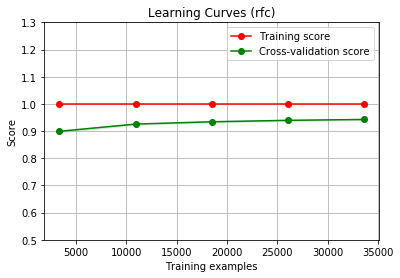

In [8]:
from sklearn.model_selection import ShuffleSplit, learning_curve

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=666)
title = 'Learning Curves (rfc)'
plot_learning_curve(best_rf_clf, title, X_pca, y, ylim=(0.5, 1.3), train_sizes=np.linspace(0.1, 1.0, 5), cv=cv, n_jobs=-1, random_state=666)